# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256

# SGD

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.0770 - acc: 0.2555 - val_loss: 1.9557 - val_acc: 0.3041
Epoch 2/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.8874 - acc: 0.3343 - val_loss: 1.8498 - val_acc: 0.3433
Epoch 3/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.8161 - acc: 0.3603 - val_loss: 1.8048 - val_acc: 0.3629
Epoch 4/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7698 - acc: 0.3782 - val_loss: 1.8082 - val_acc: 0.3569
Epoch 5/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.7333 - acc: 0.3911 - val_loss: 1.7249 - val_acc: 0.3932
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.7071 - acc: 0.3988 - val_loss: 1.7088 - val_acc: 0.3965
Epoch 7/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.6830 - acc: 0.4096 - val_loss: 1.7261 - val_ac

50000/50000 [==============================] - 5s 92us/step - loss: 2.2085 - acc: 0.1938 - val_loss: 2.1782 - val_acc: 0.2066
Epoch 3/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.1547 - acc: 0.2239 - val_loss: 2.1289 - val_acc: 0.2356
Epoch 4/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.1099 - acc: 0.2434 - val_loss: 2.0882 - val_acc: 0.2542
Epoch 5/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.0727 - acc: 0.2610 - val_loss: 2.0544 - val_acc: 0.2674
Epoch 6/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.0406 - acc: 0.2737 - val_loss: 2.0245 - val_acc: 0.2799
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.0127 - acc: 0.2871 - val_loss: 1.9993 - val_acc: 0.2940
Epoch 8/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.9886 - acc: 0.2980 - val_loss: 1.9770 - val_acc: 0.3064
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 54us/step - loss: 2.2853 - acc: 0.1528 - val_loss: 2.2757 - val_acc: 0.1558
Epoch 4/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.2716 - acc: 0.1609 - val_loss: 2.2634 - val_acc: 0.1641
Epoch 5/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.2598 - acc: 0.1695 - val_loss: 2.2524 - val_acc: 0.1728
Epoch 6/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.2489 - acc: 0.1759 - val_loss: 2.2421 - val_acc: 0.1790
Epoch 7/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.2387 - acc: 0.1819 - val_loss: 2.2324 - val_acc: 0.1873
Epoch 8/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.2289 - acc: 0.1871 - val_loss: 2.2230 - val_acc: 0.1949
Epoch 9/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.2196 - acc: 0.1923 - val_loss: 2.2140 - val_acc: 0.1998
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 3s 52us/step - loss: 2.3170 - acc: 0.1032 - val_loss: 2.3138 - val_acc: 0.1011
Epoch 5/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.3129 - acc: 0.1056 - val_loss: 2.3099 - val_acc: 0.1052
Epoch 6/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.3092 - acc: 0.1080 - val_loss: 2.3064 - val_acc: 0.1075
Epoch 7/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.3059 - acc: 0.1111 - val_loss: 2.3032 - val_acc: 0.1114
Epoch 8/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.3029 - acc: 0.1143 - val_loss: 2.3003 - val_acc: 0.1141
Epoch 9/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.3001 - acc: 0.1181 - val_loss: 2.2976 - val_acc: 0.1176
Epoch 10/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.2976 - acc: 0.1222 - val_loss: 2.2952 - val_acc: 0.1217
Epoch 11/50
50000/50000 [==========================

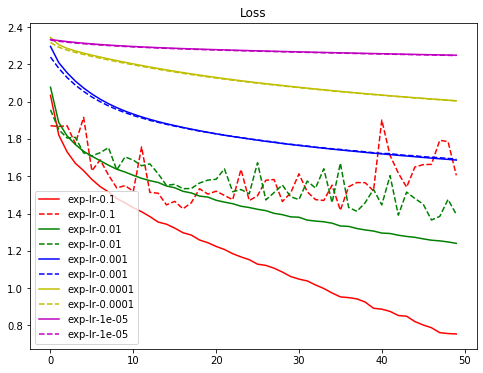

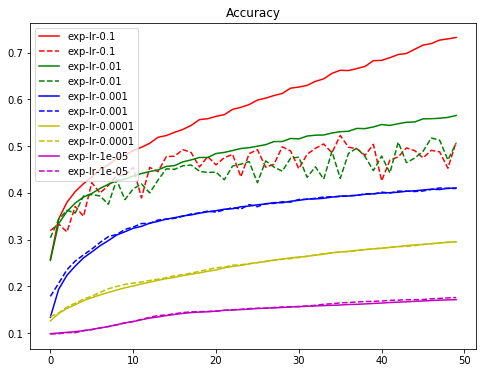

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# Adam

In [9]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 83us/step - loss: 3.1637 - acc: 0.2553 - val_loss: 1.8438 - val_acc: 0.3256
Epoch 2/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.8055 - acc: 0.3458 - val_loss: 1.9369 - val_acc: 0.3206
Epoch 3/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.7511 - acc: 0.3678 - val_loss: 1.7394 - val_acc: 0.3761
Epoch 4/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.7087 - acc: 0.3855 - val_loss: 1.7058 - val_acc: 0.3850
Epoch 5/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.6779 - acc: 0.3949 - val_loss: 1.6377 - val_acc: 0.4136
Epoch 6/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.6562 - acc: 0.4044 - val_loss: 1.7551 - val_acc: 0.3652
Epoch 7/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.6385 - acc: 0.4103 - val_loss: 1.6302 - val_acc

50000/50000 [==============================] - 4s 76us/step - loss: 1.7285 - acc: 0.3798 - val_loss: 1.6811 - val_acc: 0.4018
Epoch 3/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.6362 - acc: 0.4118 - val_loss: 1.6039 - val_acc: 0.4265
Epoch 4/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.5572 - acc: 0.4426 - val_loss: 1.5416 - val_acc: 0.4543
Epoch 5/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.5181 - acc: 0.4590 - val_loss: 1.4815 - val_acc: 0.4766
Epoch 6/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.4758 - acc: 0.4757 - val_loss: 1.4806 - val_acc: 0.4724
Epoch 7/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.4368 - acc: 0.4877 - val_loss: 1.4651 - val_acc: 0.4841
Epoch 8/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.4085 - acc: 0.4990 - val_loss: 1.5551 - val_acc: 0.4499
Epoch 9/50
50000/50000 [===========================

50000/50000 [==============================] - 4s 77us/step - loss: 1.6251 - acc: 0.4270 - val_loss: 1.6519 - val_acc: 0.4122
Epoch 4/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.5725 - acc: 0.4457 - val_loss: 1.5635 - val_acc: 0.4404
Epoch 5/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.5307 - acc: 0.4615 - val_loss: 1.5552 - val_acc: 0.4503
Epoch 6/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.4931 - acc: 0.4746 - val_loss: 1.5152 - val_acc: 0.4671
Epoch 7/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.4624 - acc: 0.4868 - val_loss: 1.5031 - val_acc: 0.4701
Epoch 8/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.4391 - acc: 0.4937 - val_loss: 1.4769 - val_acc: 0.4760
Epoch 9/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.4091 - acc: 0.5068 - val_loss: 1.4581 - val_acc: 0.4818
Epoch 10/50
50000/50000 [==========================

50000/50000 [==============================] - 4s 74us/step - loss: 1.8126 - acc: 0.3663 - val_loss: 1.7952 - val_acc: 0.3763
Epoch 5/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.7754 - acc: 0.3817 - val_loss: 1.7611 - val_acc: 0.3886
Epoch 6/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.7448 - acc: 0.3933 - val_loss: 1.7374 - val_acc: 0.3965
Epoch 7/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.7187 - acc: 0.4032 - val_loss: 1.7113 - val_acc: 0.4048
Epoch 8/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.6961 - acc: 0.4106 - val_loss: 1.6955 - val_acc: 0.4077
Epoch 9/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.6755 - acc: 0.4187 - val_loss: 1.6762 - val_acc: 0.4159
Epoch 10/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.6581 - acc: 0.4228 - val_loss: 1.6565 - val_acc: 0.4210
Epoch 11/50
50000/50000 [==========================

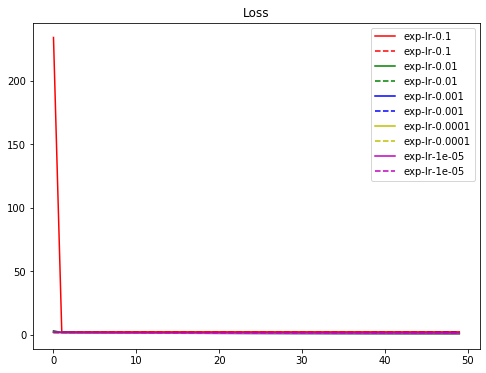

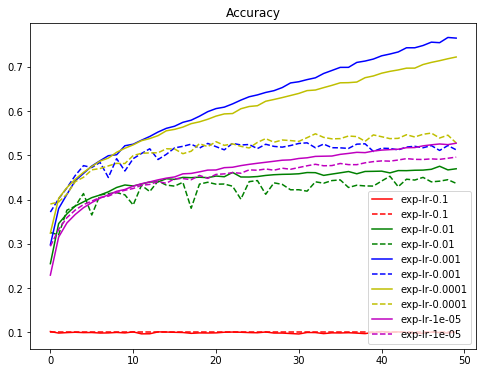

In [10]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()